In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

Police Report data can be found at [data.cityofnewyork.us](https://data.cityofnewyork.us/Public-Safety/NYPD-Complaint-Data-Historic/qgea-i56i/explore/query/SELECT%20%60cmplnt_fr_dt%60%2C%20%60boro_nm%60/page/filter). Only `CMPLNT_FT_DT` and `BORO_NM` columns are required.

In [ ]:
col = "BORO_NM"
df = pd.read_csv('../data/police/police_orig.csv', index_col=False)
df = df[["CMPLNT_FR_DT", col]]
df = df.dropna(axis=0)
df = df.set_index("CMPLNT_FR_DT").filter(regex="[0-9]{2}/[0-9]{2}/(19|20)[0-9]{2}", axis=0)
df = df.reset_index()
df['ds'] = pd.to_datetime(df['CMPLNT_FR_DT'], format="%m/%d/%Y")
df = df.loc[(df['ds'] >= '2006') & (df['ds'] < '2024')]
display(df)

In [ ]:
new_df = None
groups = df.groupby(col)
id = 0
for group in groups:
    if len(group[1]) < 100000:
        continue
    temp_df = group[1].groupby('ds')['ds'].count().to_frame(name='y').reset_index()
    temp_df.insert(1, 'unique_id', id)
    if id == 0:
        new_df = temp_df
    else:
        new_df = pd.concat((new_df, temp_df))
    id += 1
display(new_df)
new_df.to_csv('../data/police/y_police.csv')

,ds,unique_id,y
0,2006-01-01,0,421
1,2006-01-02,0,239
2,2006-01-03,0,323
3,2006-01-04,0,332
4,2006-01-05,0,354
...,...,...,...
6569,2023-12-27,4,58
6570,2023-12-28,4,65
6571,2023-12-29,4,65
6572,2023-12-30,4,59


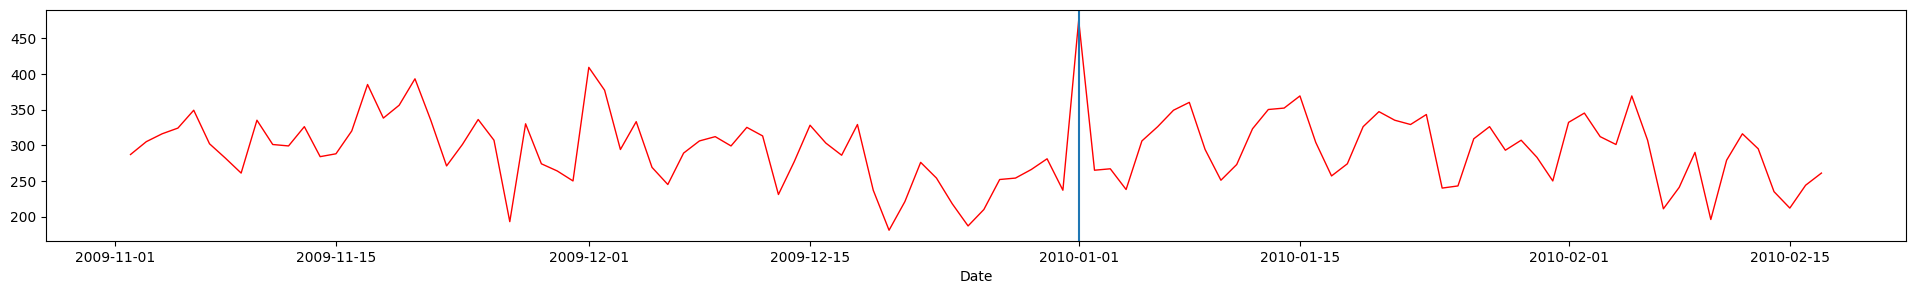

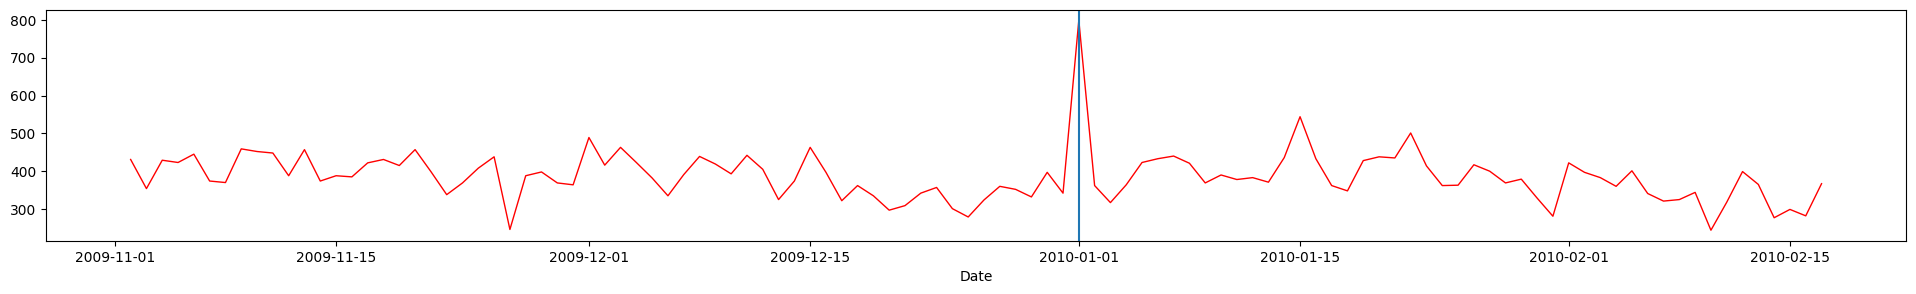

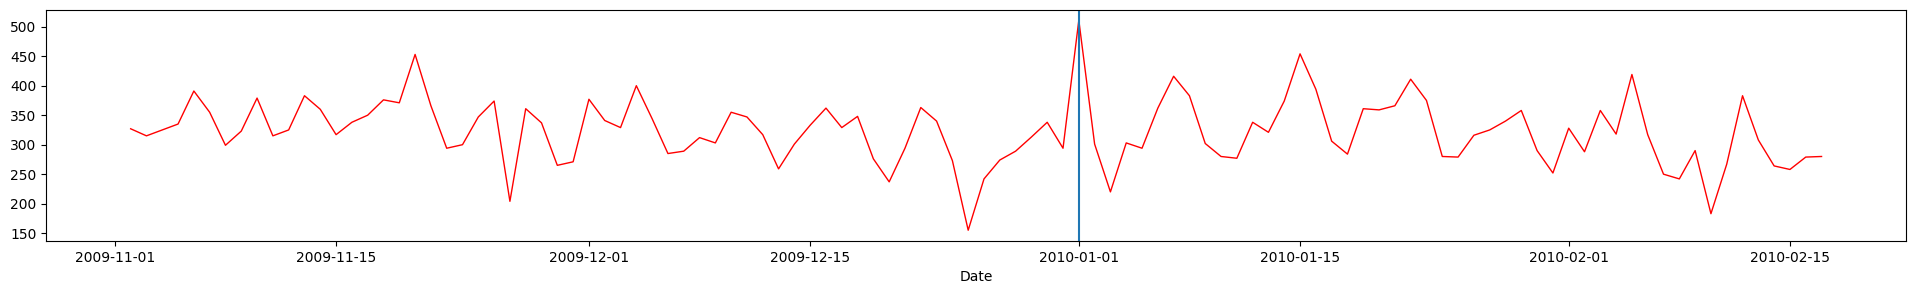

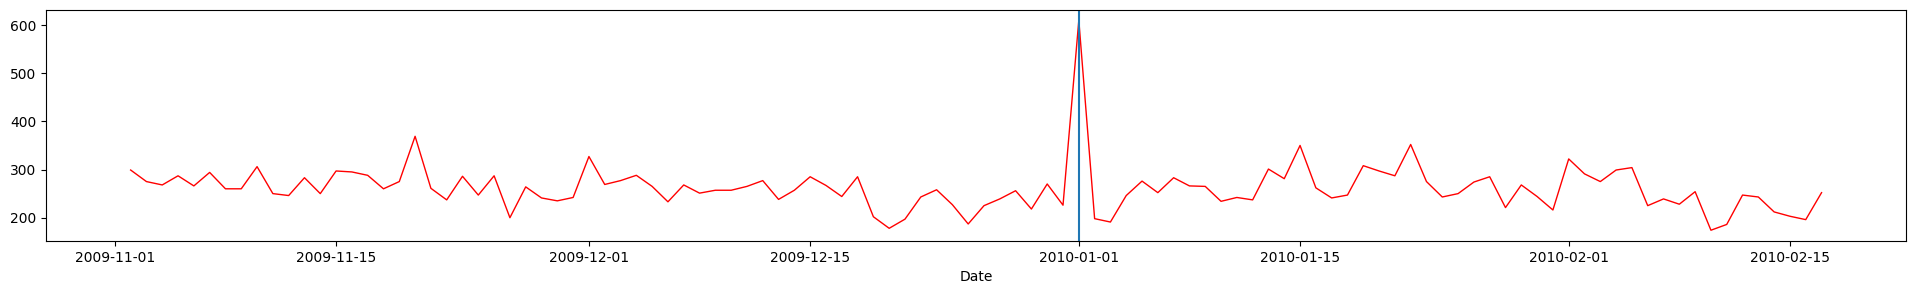

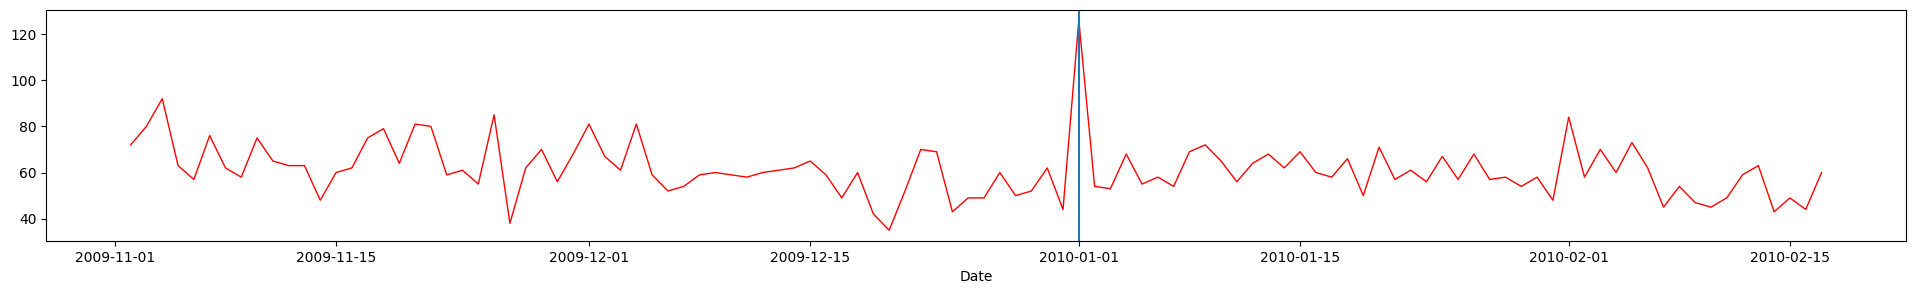

In [ ]:
def plot_df(df, id, timestamp, graph_before, steps_ahead, plt_tmp=plt, unit='D'):
    true_y = df.loc[(df["unique_id"]==id) & (df["ds"]>=timestamp-pd.Timedelta(graph_before, unit=unit)) & (df["ds"]<timestamp+pd.Timedelta(steps_ahead, unit=unit)), "y"].to_numpy().flatten()
    plt_tmp.plot(df.loc[(df["unique_id"]==id) & (df["ds"]>=timestamp-pd.Timedelta(graph_before, unit=unit)) & (df["ds"]<timestamp+pd.Timedelta(steps_ahead, unit=unit)), "ds"].to_numpy().flatten(), true_y, label=f"True", linewidth=1, color='r')

id = 0
for id in range(5):
    plt.figure(figsize=(24,3))
    timestamp = pd.Timestamp("2010-01-01")
    graph_before = 30*2
    steps_ahead = 48
    plot_df(new_df, id, timestamp, graph_before, steps_ahead)
    plt.axvline(timestamp)
    plt.xlabel("Date")
    plt.show()